In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Aylin Irem Kara - FYP/Colab/last_big_final_vader_labeled.csv")

In [5]:
df.drop_duplicates(inplace=True)
df = df.drop(df.columns[0], axis=1)

In [6]:
prices = pd.read_csv("/content/drive/MyDrive/Aylin Irem Kara - FYP/Colab/prices.csv")

In [7]:
prices = prices.drop(prices.columns[0], axis=1)

In [8]:
df

,Title,Date,Link,Sentiment
0,upcoming bitcoin episode,"May 10, 2023",https://www.coindesk.com/tv/all-about-bitcoin/...,Neutral
1,first mover asia: bitcoin ticks congestion wan...,"May 10, 2023",https://www.coindesk.com/markets/2023/05/10/fi...,Neutral
2,u.s. authorities extradite uk citizen behind 2...,"May 10, 2023",https://www.coindesk.com/business/2023/05/10/u...,Neutral
3,bitcoin moves sideways $27.5k investors await ...,"May 9, 2023",https://www.coindesk.com/markets/2023/05/09/bi...,Positive
4,blue chip firms join global blockchain network...,"May 9, 2023",https://www.coindesk.com/podcasts/coindesk-pod...,Positive
...,...,...,...,...
12517,bitcoin hits 10-month low $6k stocks plunge ma...,"Mar 12, 2020",https://www.coindesk.com/markets/2020/03/12/bi...,Negative
12518,australian tax office warn investors crypto mi...,"Mar 12, 2020",https://www.coindesk.com/policy/2020/03/12/aus...,Negative
12519,bitcoiners biohacking diy coronavirus vaccine,"Mar 12, 2020",https://www.coindesk.com/markets/2020/03/12/bi...,Neutral
12520,"ny fed promises cash, christine lagarde do?","Mar 11, 2020",https://www.coindesk.com/markets/2020/03/11/as...,Positive


In [9]:
df2 = pd.DataFrame(df)
df2['Sentiment'] = df2['Sentiment'].replace({'Positive': +1, 'Neutral': 0, 'Negative': -1})

In [10]:
df2 = df2.groupby('Date')['Sentiment'].mean().reset_index()

In [11]:
df2['Date'] = pd.to_datetime(df2['Date'])
prices['Date'] = pd.to_datetime(prices['Date'])

In [12]:
all = pd.merge(df2, prices[['Date', 'Price']], on='Date', how='left')

In [13]:
all = all.sort_values(by='Date')

In [14]:
all = all.rename(columns={'Sentiment': 'Score'})

In [15]:
all

,Date,Score,Price
571,2020-03-11,0.000000,7911.430176
575,2020-03-12,-0.133333,4970.788086
578,2020-03-13,-0.357143,5563.707031
582,2020-03-14,0.000000,5200.366211
586,2020-03-15,-0.500000,5392.314941
...,...,...,...
739,2023-05-04,0.043478,28847.710938
743,2023-05-05,-0.266667,29534.384766
751,2023-05-08,-0.166667,27694.273438
755,2023-05-09,0.103448,27658.775391


In [16]:
for i, row in all.iterrows():
    if (all.loc[i, 'Score'] < 0):
      all.loc[i, 'New_Score'] = -1
    elif (all.loc[i, 'Score'] == 0):
      all.loc[i, 'New_Score'] = 0
    elif (all.loc[i, 'Score'] > 0):
      all.loc[i, 'New_Score'] = +1

In [17]:
all = all.sort_values(by='Date').reset_index(drop=True)

In [18]:
all = all.rename(columns={'New_Score': 'New Score'})
all

,Date,Score,Price,New Score
0,2020-03-11,0.000000,7911.430176,0.0
1,2020-03-12,-0.133333,4970.788086,-1.0
2,2020-03-13,-0.357143,5563.707031,-1.0
3,2020-03-14,0.000000,5200.366211,0.0
4,2020-03-15,-0.500000,5392.314941,-1.0
...,...,...,...,...
983,2023-05-04,0.043478,28847.710938,1.0
984,2023-05-05,-0.266667,29534.384766,-1.0
985,2023-05-08,-0.166667,27694.273438,-1.0
986,2023-05-09,0.103448,27658.775391,1.0


In [19]:
all.reset_index(drop=True, inplace = True)

Dow Jones and USDI

In [20]:
dow_jones = pd.read_csv("/content/drive/MyDrive/Aylin Irem Kara - FYP/Colab/Dow_Jones.csv")
usdi = pd.read_csv("/content/drive/MyDrive/Aylin Irem Kara - FYP/Colab/usdi.csv")

In [21]:
dow_jones.head()
dow_jones = dow_jones[['Date' , 'Price']]
dow_jones = dow_jones.rename(columns={'Price': 'Dow_Jones'})
dow_jones['Date'] = pd.to_datetime(dow_jones['Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
dow_jones.head()

,Date,Dow_Jones
0,2023-05-10,"33,531.00"
1,2023-05-09,"33,562.14"
2,2023-05-08,"33,618.55"
3,2023-05-05,"33,674.31"
4,2023-05-04,"33,127.94"


In [22]:
usdi = usdi[['Date' , 'Price']]
usdi = usdi.rename(columns={'Price': 'USDI'})
usdi['Date'] = pd.to_datetime(usdi['Date']).dt.strftime('%Y-%m-%d')
usdi

,Date,USDI
0,2023-05-10,101.269
1,2023-05-09,101.399
2,2023-05-08,101.155
3,2023-05-05,100.999
4,2023-05-04,101.184
...,...,...
814,2020-03-17,99.719
815,2020-03-16,98.152
816,2020-03-13,98.904
817,2020-03-12,97.654


In [23]:
for i in range(len(dow_jones['Dow_Jones'])):
      value_str = dow_jones.loc[i, 'Dow_Jones'].replace(',', '')
      value_str = value_str.split('.')[0]
      dow_jones.at[i, 'Dow_Jones'] = float(value_str)

dow_jones['Dow_Jones'] = dow_jones['Dow_Jones'].astype(float).astype(int)

In [24]:
addition = pd.merge(dow_jones, usdi, on='Date',how='outer')

In [25]:
addition['Date'] = pd.to_datetime(addition['Date'])

In [26]:
all = pd.merge(all, addition, on='Date',how='left')
all['Dow_Jones'] = all['Dow_Jones'].fillna(dow_jones['Dow_Jones'].mean())

In [27]:
all['USDI'] = all['USDI'].fillna(usdi['USDI'].mean())

In [28]:
all['USDI']. corr(all['Price'])

-0.3574492850638421

In [29]:
all['Tomorrow_Price'] = all['Price'].shift(-1)

In [30]:
for i, row in all.iterrows():
      upper_thresh = all.loc[i, 'Price'] * 1.02
      lower_thresh = all.loc[i, 'Price'] * 0.98

      if all.loc[i, 'Tomorrow_Price'] > upper_thresh:
          all.loc[i, 'Target'] = 1
      elif all.loc[i, 'Tomorrow_Price'] < lower_thresh:
          all.loc[i, 'Target'] = -1
      else:
          all.loc[i, 'Target'] = 0

In [31]:
all.drop('Tomorrow_Price',axis=1, inplace=True)

In [32]:
all['Target'].value_counts()

 0.0    534
 1.0    242
-1.0    212
Name: Target, dtype: int64

In [33]:
all

,Date,Score,Price,New Score,Dow_Jones,USDI,Target
0,2020-03-11,0.000000,7911.430176,0.0,23553.000000,96.442000,-1.0
1,2020-03-12,-0.133333,4970.788086,-1.0,21200.000000,97.654000,1.0
2,2020-03-13,-0.357143,5563.707031,-1.0,23185.000000,98.904000,-1.0
3,2020-03-14,0.000000,5200.366211,0.0,31682.165414,97.920413,1.0
4,2020-03-15,-0.500000,5392.314941,-1.0,31682.165414,97.920413,-1.0
...,...,...,...,...,...,...,...
983,2023-05-04,0.043478,28847.710938,1.0,33127.000000,101.184000,1.0
984,2023-05-05,-0.266667,29534.384766,-1.0,33674.000000,100.999000,-1.0
985,2023-05-08,-0.166667,27694.273438,-1.0,33618.000000,101.155000,0.0
986,2023-05-09,0.103448,27658.775391,1.0,33562.000000,101.399000,0.0


Log reg - price and score

In [34]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm

In [35]:
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report,f1_score,recall_score,roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc,rcParams
import itertools

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
X = all[['Price','Score']]
y = all['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import numpy as np
model = LogisticRegression()
model.fit(X_train, y_train)

all['PredictedDirection'] = model.predict(X)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f"%(accuracy))

Accuracy: 0.525


In [ ]:
y_train.value_counts()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        43
         0.0       0.53      1.00      0.69       104
         1.0       0.00      0.00      0.00        51

    accuracy                           0.53       198
   macro avg       0.18      0.33      0.23       198
weighted avg       0.28      0.53      0.36       198



In [ ]:
y_train.value_counts()

 0.0    430
 1.0    191
-1.0    169
Name: Target, dtype: int64

SVM - Price and Score

In [ ]:
from sklearn.svm import SVC
X = all[['Price','Score']]
y = all['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

In [ ]:
print(classification_report(y_test, y_pred))

Random Forest Classification - Price and score


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = all[['Price','Score']]
y = all['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Create the grid search object
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from scipy.stats import randint

X = all[['Price','Score']]
y = all['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4494949494949495


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.30      0.26      0.28        46
         0.0       0.57      0.66      0.61       102
         1.0       0.24      0.20      0.22        50

    accuracy                           0.45       198
   macro avg       0.37      0.37      0.37       198
weighted avg       0.43      0.45      0.44       198



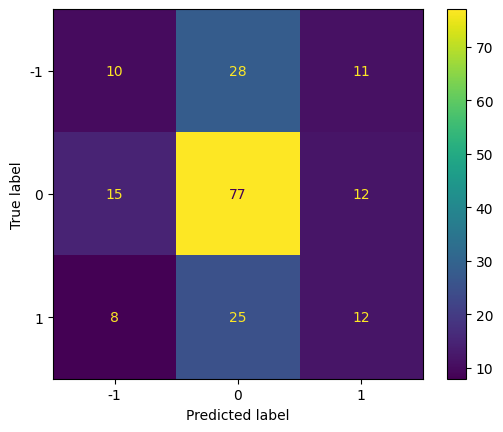

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['-1', '0','1'])

cm_display.plot()
plt.show()

In [ ]:
import pickle

In [ ]:
filename = '/content/RF_firstpred_original.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
from imblearn.combine import SMOTETomek

Log Reg - Score Price (SMOTE-TOMEK)

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.combine import SMOTETomek
X = all[['Price','Score']]
y = all['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smt = SMOTETomek(random_state=42)
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

all['PredictedDirection'] = model.predict(X)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f"%(accuracy))

Accuracy: 0.217


In [ ]:
y_train_res.value_counts()

 1.0    303
-1.0    287
 0.0    272
Name: Target, dtype: int64

In [ ]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average=None)
print("F1 Score:", f1)

support = classification_report(y_test, y_pred)
print("Support:\n", support)

Precision: [0.21717172 0.         0.        ]
Recall: [1. 0. 0.]
F1 Score: [0.35684647 0.         0.        ]
Support:
               precision    recall  f1-score   support

        -1.0       0.22      1.00      0.36        43
         0.0       0.00      0.00      0.00       104
         1.0       0.00      0.00      0.00        51

    accuracy                           0.22       198
   macro avg       0.07      0.33      0.12       198
weighted avg       0.05      0.22      0.08       198



RF - Price and Score (SMOTE-TOMEK)

In [ ]:
X = all[['Price','Score']]
y = all['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote_tomek = SMOTETomek(random_state=42)
X_train_res, y_train_res = smote_tomek.fit_resample(X_train, y_train)


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Create the grid search object
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train_res, y_train_res)

# Print the best parameters
print(grid_search.best_params_)

In [ ]:
X = all[['Price','Score']]
y = all['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote_tomek = SMOTETomek(random_state=42)
X_train_res, y_train_res = smote_tomek.fit_resample(X_train, y_train)

rf = RandomForestClassifier(max_depth = 7, min_samples_leaf =1, min_samples_split = 2, n_estimators =  200)
rf.fit(X_train_res, y_train_res)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.43434343434343436
              precision    recall  f1-score   support

        -1.0       0.36      0.33      0.34        43
         0.0       0.58      0.56      0.57       104
         1.0       0.24      0.27      0.25        51

    accuracy                           0.43       198
   macro avg       0.39      0.39      0.39       198
weighted avg       0.44      0.43      0.44       198



In [ ]:
filename = '/content/RF_firstpred_balanced.sav'
pickle.dump(model, open(filename, 'wb'))

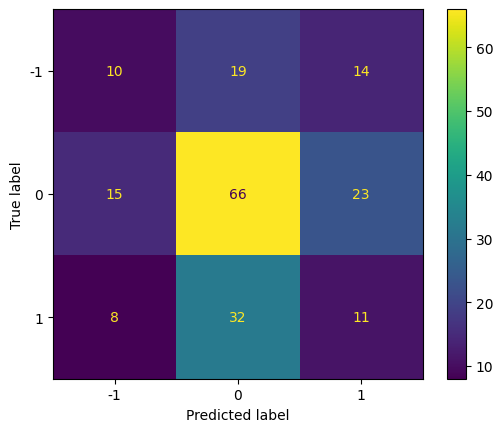

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['-1', '0','1'])

cm_display.plot()
plt.show()

In [ ]:
y_train_res.value_counts()

SVM -Price and Score(SMOTE Tomek)

In [ ]:
!pip install scikit-learn-intelex

In [ ]:
from sklearn.svm import SVC

X = all[['Price','Score']]
y = all['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote_tomek = SMOTETomek(random_state=42)
X_train_res, y_train_res = smote_tomek.fit_resample(X_train, y_train)

svm = SVC(kernel='linear')
svm.fit(X_train_res, y_train_res)

y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
y_train_res.value_counts()

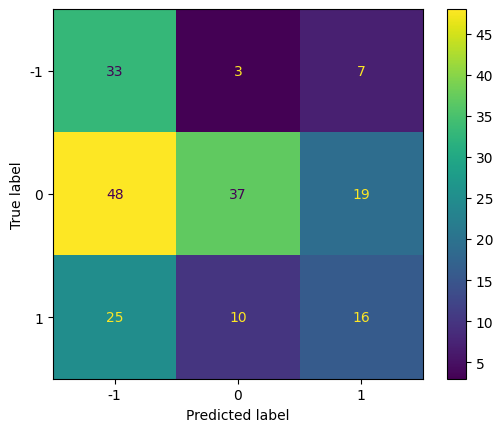

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['-1', '0','1'])

cm_display.plot()
plt.show()

In [ ]:
filename = '/content/headline_based_svm.sav'
pickle.dump(model, open(filename, 'wb'))

Log Reg- USDI, Dow Jones,Price, Score

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay


X = all[['Score','Price','USDI','Dow_Jones']]
y = all['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(random_state=16)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        43
         0.0       0.53      1.00      0.69       104
         1.0       0.00      0.00      0.00        51

    accuracy                           0.53       198
   macro avg       0.18      0.33      0.23       198
weighted avg       0.28      0.53      0.36       198



In [ ]:
y_train.value_counts()

RF- USDI, Dow Jones,Price, Score

In [57]:
from sklearn.ensemble import RandomForestClassifier

X = all[['Score','Price','USDI','Dow_Jones']]
y = all['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4797979797979798


In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.36      0.21      0.26        43
         0.0       0.55      0.73      0.63       104
         1.0       0.28      0.20      0.23        51

    accuracy                           0.48       198
   macro avg       0.40      0.38      0.38       198
weighted avg       0.44      0.48      0.45       198



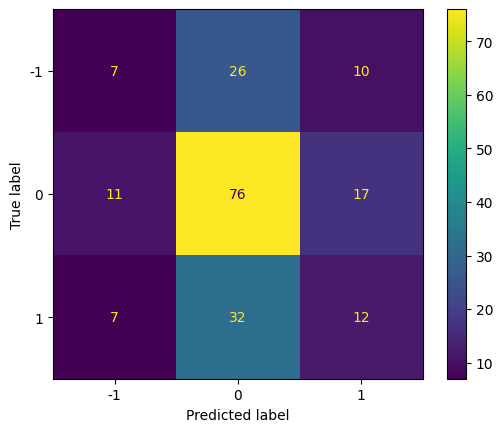

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['-1', '0','1'])

cm_display.plot()
plt.show()

In [ ]:
import pickle

In [59]:
filename = '/content/rf_secondpred_original.sav'
pickle.dump(model, open(filename, 'wb'))

SVM -USDI, Dow Jones,Price,Score

In [ ]:
X = all[['Score','Price','USDI','Dow_Jones']]
y = all['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear')

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

In [ ]:
print(classification_report(y_test, y_pred))

Log reg - Price,USDI, DJ, Score - SMOTE Tomek Links

In [42]:
from imblearn.combine import SMOTETomek

In [43]:
X = all[['Score','Price','USDI','Dow_Jones']]
y = all['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote_tomek = SMOTETomek(random_state=42)
X_train_res, y_train_res = smote_tomek.fit_resample(X_train, y_train)

model = LogisticRegression(random_state=123)
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.31      0.65      0.42        43
         0.0       0.65      0.50      0.57       104
         1.0       0.30      0.16      0.21        51

    accuracy                           0.44       198
   macro avg       0.42      0.44      0.40       198
weighted avg       0.48      0.44      0.44       198



In [ ]:
y_train_res.value_counts()

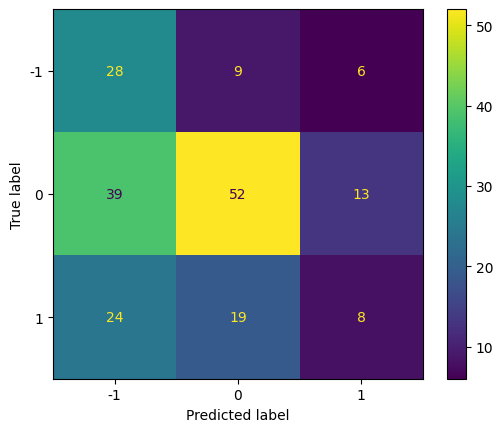

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['-1', '0','1'])

cm_display.plot()
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy))

In [44]:
import pickle

In [45]:
filename = '/content/logreg_secondpred_balanced.sav'
pickle.dump(model, open(filename, 'wb'))

RF - Price,USDI, DJ, Score - SMOTE Tomek Links

In [49]:
from imblearn.combine import SMOTETomek

In [55]:
X = all[['Price','Score','USDI','Dow_Jones']]
y = all['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote_tomek = SMOTETomek(random_state=42)
X_train_res, y_train_res = smote_tomek.fit_resample(X_train, y_train)

model = RandomForestClassifier(max_depth = 7, min_samples_leaf = 1, min_samples_split = 5, n_estimators= 300)
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.27      0.42      0.33        43
         0.0       0.58      0.41      0.48       104
         1.0       0.28      0.31      0.29        51

    accuracy                           0.39       198
   macro avg       0.38      0.38      0.37       198
weighted avg       0.44      0.39      0.40       198



In [56]:
filename = '/content/RF_secondpred_balanced.sav'
pickle.dump(model, open(filename, 'wb'))

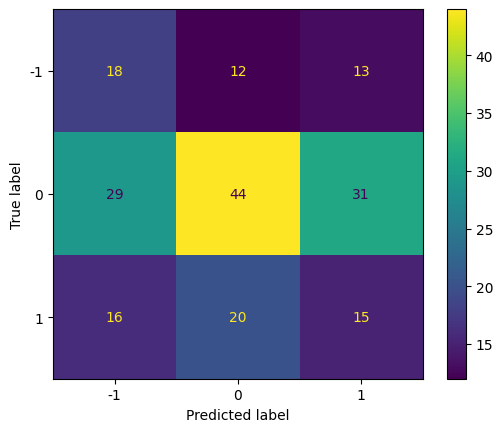

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['-1', '0','1'])

cm_display.plot()
plt.show()

SVM - Price,USDI, DJ, Score - SMOTE Tomek Links

In [46]:
from sklearn.svm import SVC

X = all[['Score','Price','USDI','Dow_Jones']]
y = all['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote_tomek = SMOTETomek(random_state=42)
X_train_res, y_train_res = smote_tomek.fit_resample(X_train, y_train)

svm = SVC(kernel='linear')
svm.fit(X_train_res, y_train_res)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.37


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.28      0.67      0.40        43
         0.0       0.60      0.34      0.43       104
         1.0       0.27      0.20      0.23        51

    accuracy                           0.37       198
   macro avg       0.39      0.40      0.35       198
weighted avg       0.45      0.37      0.37       198



In [ ]:
y_train_res.value_counts()

-1.0    338
 1.0    338
 0.0    298
Name: Target, dtype: int64

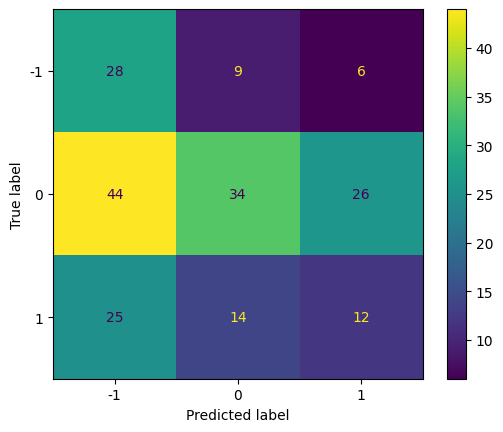

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['-1', '0','1'])

cm_display.plot()
plt.show()

In [48]:
filename = '/content/svm_secondpred_balanced.sav'
pickle.dump(model, open(filename, 'wb'))